## Tutorial on Cosine Similarity and Soft Cosine Similarity using Python

### 1. Introduction

#### 1.1. Brief about Cosine Similarity

Cosine similarity is a metric used to determine the cosine of the angle between two non-zero vectors in an inner product space. In the context of text analysis, cosine similarity is commonly employed to measure the degree of similarity between two texts (represented as vectors). A value of 0 indicates that the vectors are orthogonal (meaning they are dissimilar), while a value of 1 indicates that they are identical.

#### 1.2. Use-cases

- **Document Similarity**: Determining how similar two pieces of text are. This is useful in applications such as plagiarism detection.
- **Recommendation Systems**: Recommending products or media to users based on their similarity to previously liked items.
- **Semantic Analysis**: Understanding the meaning of content by comparing it with other known content.

### 2. Data Preparation

#### 2.1. Importing Text Files

First, let's start by importing the provided text files and store their content for further processing.

#### 2.2. Fetching Wikipedia Content

We will fetch articles from Wikipedia for various programming languages and countries to include them in our analysis.

#### 2.3. Preprocessing and Tokenization

Before calculating similarity, we need to preprocess and tokenize the documents. This step involves converting the raw text into a structured format that can be easily analyzed.

### 3. Cosine Similarity using Bag-of-Words (BoW)

#### 3.1. Definition and Formula

We'll represent each document as a Bag-of-Words (BoW) vector and then compute the cosine similarity matrix.

#### 3.2. Visualization using Heatmap

A heatmap is an effective way to visualize the similarity matrix, as it allows us to quickly identify which documents are closely related to each other based on their color intensity.

### 4. Soft Cosine Similarity using Word Embeddings

#### 4.1. What is Soft Cosine Similarity?

While the cosine similarity provides a measure of similarity between two documents, it might not capture the semantic similarity effectively. Soft cosine similarity overcomes this limitation by taking into account the semantic meaning of words in the documents.

#### 4.2. Visualization using Heatmap

We will visualize the soft cosine similarity matrix using a heatmap to understand the semantic relationships between the documents.

### 5. Concluding Remarks

#### 5.1. Key Takeaways

Through this tutorial, we have seen how to compute and visualize both cosine and soft cosine similarities between various documents. These techniques are powerful tools in the domain of natural language processing and offer vast potential in understanding and comparing textual data.



In [6]:
# Specify the file paths
file_paths = [
    './data/Javascript_gpt.txt', 
    './data/Python_gpt.txt',
    './data/finance_gpt.txt', 
    './data/wallstreet_gpt.txt', 
    './data/Hafez_gpt.txt', 
    './data/rumi_gpt.txt',
    './data/UnitedStates_gpt.txt',
    './data/Canada_gpt.txt'
]

non_wiki_names = [
    'Javascript_gpt',
    'Python_gpt',
    'Finance_gpt', 
    'Wallstreet_gpt', 
    'Hafez_gpt', 
    'Rumi_gpt',
    'UnitedStates_gpt',
    'Canada_gpt'
]

# Create a list to store the file contents
file_contents = []

# Read the contents of each file and append them to the list
for file_path in file_paths:
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_contents.append(file.read())
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except UnicodeDecodeError:
        print(f"Unable to decode {file_path}, skipping...")


Fetching Wikipedia Content
Now, we will fetch articles from Wikipedia for various programming languages and countries to include them in our analysis.

In [7]:
import wikipedia
import gensim

# List of topics to fetch articles for
topics = [
    "Python programming", 
    "java programming language", 
    "JavaScript", 
    "Fortran ",
    "C++", 
    "PHP general-purpose scripting language",
    "SQL programming language",
    "C#",
    "Swift programing",
    "Ruby programming language",
    "United States country",
    "Canada country"
]

# Dictionary to store the content of each topic article
docs = {}

# Fetch content for each topic and store it in the dictionary
for topic in topics:
    try:
        docs[topic] = wikipedia.page(topic).content
        # Print the first 500 characters for a quick glimpse
        print(f"\n{'='*50}\n{topic}\n{'='*50}\n")
        print(docs[topic][:500])
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation error for {topic}: {e.options}")
    except wikipedia.exceptions.PageError as e:
        print(f"PageError for {topic}: {e}")

# Adding non-wikipedia corpus
for i, non_wiki in enumerate(non_wiki_names):
    topics.append(non_wiki)
    docs[non_wiki] = file_contents[i]



Python programming

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s as 

java programming language

Java is a high-level, class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let programmers write once, run anywhere (WORA), meaning that compiled Java code can run on all platforms that support Java without the need to recompile. Java applications are typically compiled to bytecode that can run on any Java virtual machine

3. Preprocessing and Tokenization
Before calculating similarity, we need to preprocess and tokenize the documents. This step involves converting the raw text into a structured format that can be easily analyzed.

In [8]:
# Tokenizing the documents for further processing
docs_tokenized = {topic: gensim.utils.simple_preprocess(docs[topic]) for topic in topics}


4. Cosine Similarity using Bag-of-Words (BoW)
We'll represent each document as a Bag-of-Words (BoW) vector and then compute the cosine similarity matrix.

Visualization using Heatmap
A heatmap is an effective way to visualize the similarity matrix, as it allows us to quickly identify which documents are closely related to each other based on their color intensity.

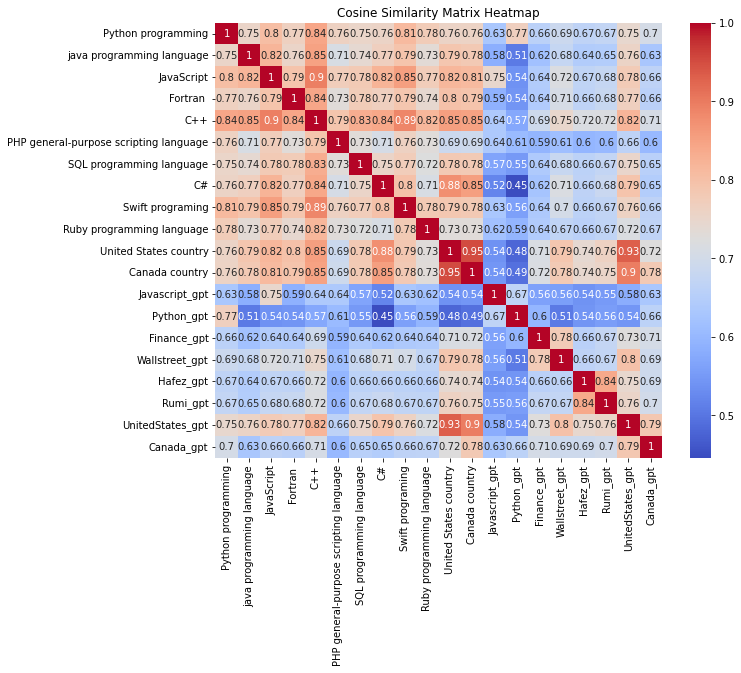

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import gensim.matutils as matutils
from gensim import corpora
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Dictionary from the articles
dictionary = corpora.Dictionary(docs_tokenized.values())

# Convert tokenized documents into BoW format
corpus = {topic: dictionary.doc2bow(docs_tokenized[topic]) for topic in topics}

# Convert the BoW vectors to dense format for computation with scikit-learn
dense_corpus = {topic: matutils.corpus2dense([corpus[topic]], num_terms=len(dictionary)).T[0] for topic in topics}

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(np.array(list(dense_corpus.values())))

# Setting up the plot environment
plt.figure(figsize=(10, 8))

# Create a heatmap of the cosine similarity matrix
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=topics, yticklabels=topics)

plt.title('Cosine Similarity Matrix Heatmap')
plt.show()


## Analyzing the Cosine Similarity Matrix Heatmap

### 1. General Description of the Cosine Similarity Matrix

The cosine similarity matrix provides a quantifiable measure of how similar each document is in relation to every other document. The values range between 0 and 1, where 1 indicates that the documents are identical, and values closer to 0 suggest that the documents are dissimilar.

### 2. Source of Documents

It's important to note the distinction between the labels:
- Labels with the suffix `_gpt` are texts generated by ChatGPT-4.
- Labels without this suffix represent Wikipedia articles.

### 3. Self-Similarity

As expected, each article is most similar to itself. This is evident from the diagonal line of 1's in the heatmap.

### 4. Wikipedia Articles Similarity

Wikipedia articles tend to have a consistent structure, tone, and use of language, leading to relatively similar cosine scores among them. This pattern is evident in the heatmap, where Wikipedia articles display clusters of higher similarity values with each other.

### 5. ChatGPT Text Trend

The ChatGPT generated texts do not follow the same trend as the Wikipedia articles. This deviation could be due to several reasons:
- **Diverse Topics**: ChatGPT might have generated content on a broader range of sub-topics within the given theme.
- **Writing Style**: The language model's style might differ from the typical Wikipedia style, leading to differences in word choice, sentence structure, and tone.
- **Information Density**: ChatGPT texts might be more concise or expansive in certain areas compared to Wikipedia.

### Next Steps

To gain deeper insights into the semantic similarities between the documents, we will next explore the soft cosine similarity. This metric, leveraging word embeddings, captures nuanced relationships and semantic meanings that standard cosine similarity might overlook.


100%|█████████████████████████████████████████████████████████████████████████████████████| 8441/8441 [26:28<00:00,  5.32it/s]


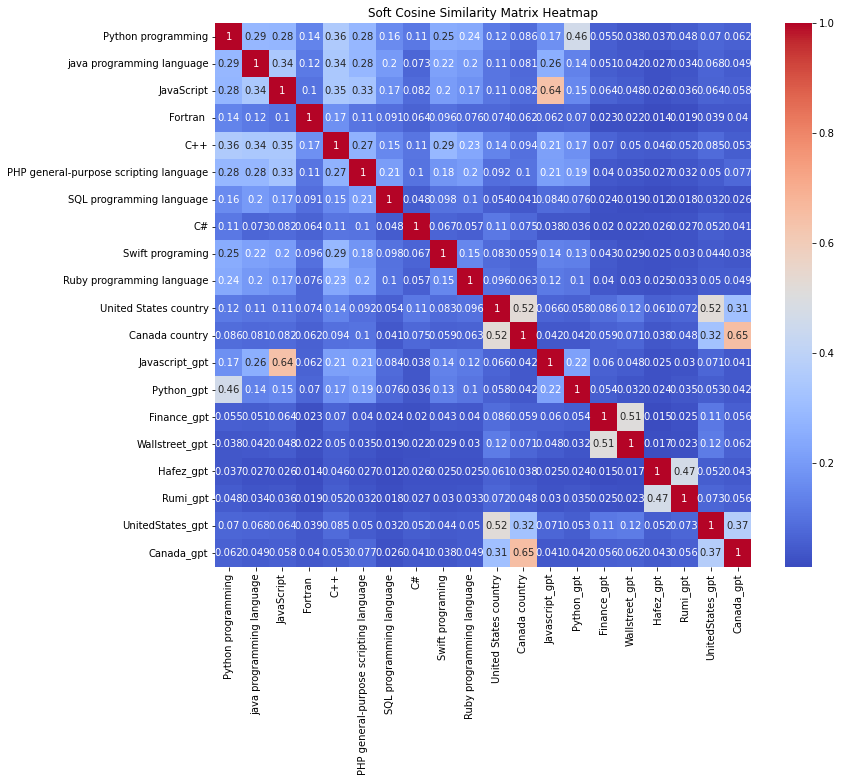

In [10]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import gensim.downloader as api
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex

# Assuming docs_tokenized is your preprocessed multi-language dictionary
documents = [docs_tokenized[topic] for topic in topics]

# Build a dictionary from the processed sentences
dictionary = Dictionary(documents)

# Convert the processed sentences to bag-of-words vectors using the dictionary
bow_docs = {topic: dictionary.doc2bow(docs_tokenized[topic]) for topic in topics}

# Build a TF-IDF model using the bag-of-words vectors
tfidf = TfidfModel(list(bow_docs.values()))

# Transform the bag-of-words vectors with the TF-IDF model
tfidf_docs = {topic: tfidf[bow_docs[topic]] for topic in topics}

# Load pre-trained Word2Vec embeddings
model = api.load('word2vec-google-news-300')

# Build a term similarity matrix using the Word2Vec embeddings and the dictionary
termsim_index = WordEmbeddingSimilarityIndex(model)
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf)

# Compute the Soft Cosine Measure using the inner_product method
similarity_matrix = {}
for topic1 in topics:
    for topic2 in topics:
        similarity = termsim_matrix.inner_product(tfidf_docs[topic1], tfidf_docs[topic2], normalized=(True, True))
        similarity_matrix[(topic1, topic2)] = similarity

# Convert the similarity matrix to 2D array for heatmap
soft_cosine_similarity_matrix = np.zeros((len(topics), len(topics)))
for pair, sim in similarity_matrix.items():
    i = topics.index(pair[0])
    j = topics.index(pair[1])
    soft_cosine_similarity_matrix[i, j] = sim
    soft_cosine_similarity_matrix[j, i] = sim  # the matrix is symmetric

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(soft_cosine_similarity_matrix, annot=True, cmap='coolwarm', xticklabels=topics, yticklabels=topics)
plt.title('Soft Cosine Similarity Matrix Heatmap')
plt.show()


## Analysis of the Soft Cosine Similarity Matrix

### 1. Understanding Soft Cosine Similarity

Soft cosine similarity considers the semantic relationships between individual words, making it more nuanced compared to the standard cosine similarity. By leveraging word embeddings, soft cosine similarity captures the semantic meanings and relationships that the standard cosine similarity might overlook.

### 2. Key Observations from the Soft Cosine Similarity Heatmap:

#### 2.1. Disappearance of Wikipedia Article Similarities

In stark contrast to the standard cosine similarity matrix, the typical similarity observed between Wikipedia articles has vanished. This suggests that while Wikipedia articles might share a common structural or lexical pattern, their semantic content can be quite distinct.

#### 2.2. High Semantic Similarity in Articles on Similar Subjects

- Articles on similar subjects exhibit strong semantic similarities. For instance, "Python Programming" and "Python_gpt" display notable similarity, indicating that the content generated by ChatGPT for Python aligns well with the Wikipedia article on Python programming.
- Similarly, "United States country" and "United States_gpt" show a strong semantic relationship, highlighting the relevance of the content generated by ChatGPT about the United States.

#### 2.3. Soft Cosine Similarity Reveals Subject Matter Sensitivity

- Articles on related themes, such as programming languages, exhibit similarities. For instance, despite being different languages, "C++" and "JavaScript" have a similarity of 0.35, pointing to the shared concepts and terminologies between programming languages.
- Other pairs with notable similarity include but not limited to:
    - "Wall Street_gpt" and "Finance_gpt": This makes sense given that Wall Street is synonymous with finance and economic activities.
    - "Hafez_gpt" and "Rumi_gpt": Both Hafez and Rumi are iconic Persian poets, and their themes, styles, and references might have considerable overlap.

### 3. Comparing with Standard Cosine Similarity

The soft cosine similarity matrix emphasizes the semantic content of documents over their structural or lexical patterns. This focus on semantics becomes evident when we notice the high similarity scores between articles on related subjects. On the other hand, the standard cosine similarity was influenced by the structure and common terms, leading to apparent similarities between Wikipedia articles regardless of their actual content.

### 4. Concluding Thoughts

The soft cosine similarity provides a deeper and more semantically-driven perspective on document relationships. By juxtaposing it with the standard cosine similarity, we can appreciate the unique insights each method offers. While the former is sensitive to the inherent meaning of the content, the latter is influenced by structural and lexical patterns. This dual approach ensures a comprehensive understanding of document relationships, beneficial for various text analysis tasks.


